In [1]:
import pandas as pd
import Procedatos as P
import Graficos as G
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Heatmaps

/Users/edgar/Repositorios/ElFarolArthur/Procedatos.py:81: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():
/Users/edgar/Repositorios/ElFarolArthur/Procedatos.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lleva_recurso'] = df['Puntaje'].apply(lambda x: 1 if x == 1 else 0)


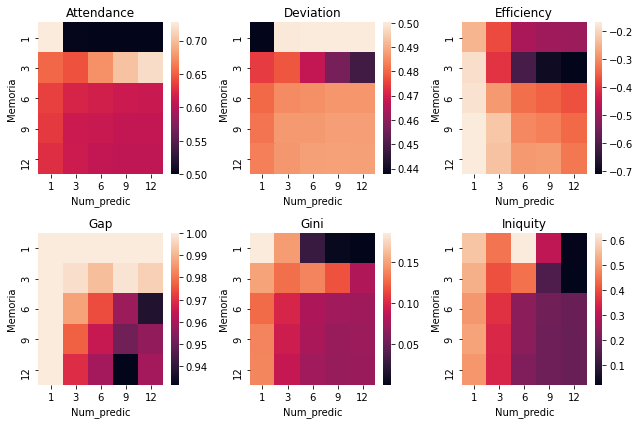

In [2]:
data = P.leer_datos([1,3,6,9,12],[1,3,6,9,12],[0],verb=False)
G.graficar_heatmaps(data, parametros=['Memoria','Num_predic'])

* El promedio de `Attendance` más bajo es con memoria 1 y con 12 predictores.
* La mayor desviación estándar en el `Attendance` es con memoria 1 y con 12 predictores.
* El mayor `Efficiency` es con memoria 12 y con 1 solo predictor.
* El menor `Gini` es con memoria 1 y con 12 predictores.
* El menor `Iniquity` es con memoria 3 y con 12 predictores.

En general:

* Aumentar la memoria disminuye el promedio del `Attendance`.
* Aumentar el número de predictores disminuye el promedio del `Attendance`, aunque aumenta su desviación estándar.

# Variando memoria

/Users/edgar/Repositorios/ElFarolArthur/Procedatos.py:81: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


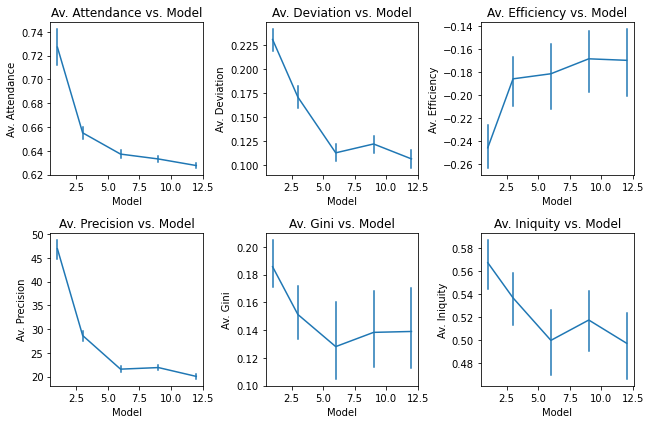

In [14]:
data = P.leer_datos([1,3,6,9,12],[1],[0],verb=False)
data['Modelo'] = data['Memoria']
G.comparacion(data)

# Variando predictores

/Users/edgar/Repositorios/ElFarolArthur/Procedatos.py:81: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


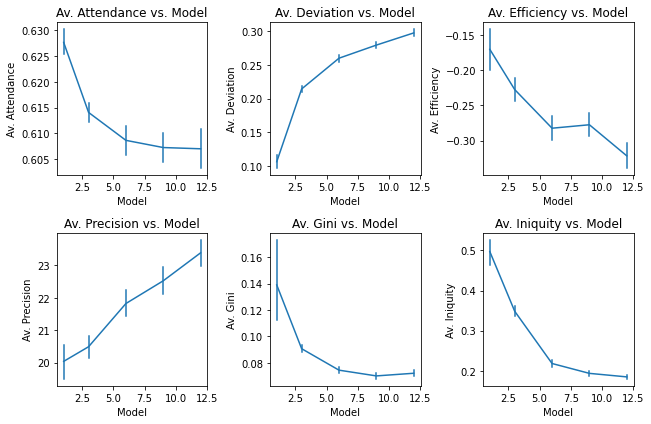

In [4]:
data = P.leer_datos([12],[1,3,6,9,12],[0],verb=False)
data['Modelo'] = data['Num_predic']
G.comparacion(data)

Curiosamente, hay una correlación inversa entre el promedio de la `Precision` y el promedio de la `Efficiency`.

También es cierto que hay una correlación directa entre el promedio de la `Precision` y el promedio de la `Deviation`.

La precisión disminuye al aumentar la memoria.

La precisión aumenta al aumentar el número de predictores.

# Examinando Precisión vs Puntaje

/Users/edgar/Repositorios/ElFarolArthur/Procedatos.py:81: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


<AxesSubplot:xlabel='Ronda', ylabel='Attendance'>

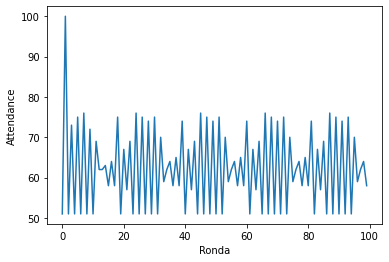

In [12]:
data = P.leer_datos([12],[1],[0], verb=False)
ids = data.Identificador.unique().tolist()[4]
df = data[data['Identificador'] == ids].groupby('Ronda')['Estado'].sum().reset_index(name='Attendance')
sns.lineplot(x='Ronda',y='Attendance',data=df)

/Users/edgar/Repositorios/ElFarolArthur/Procedatos.py:81: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


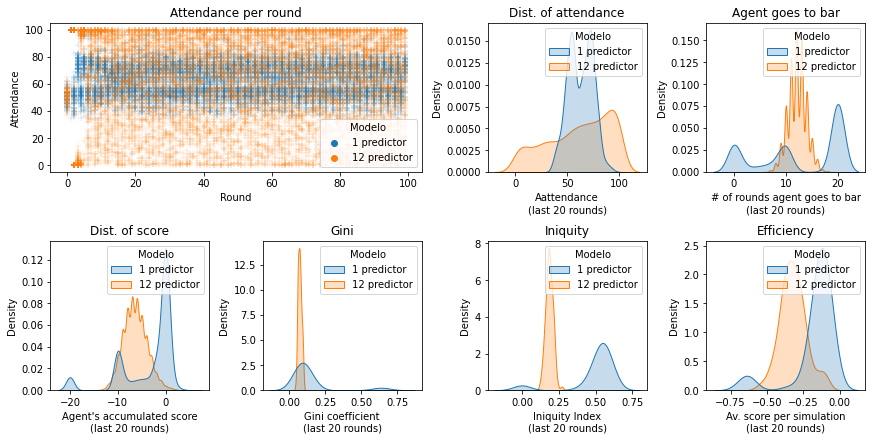

In [3]:
data1 = P.leer_datos([12],[1],[0], verb=False)
data1['Modelo'] = '1 predictor'
data2 = P.leer_datos([12],[12],[0], verb=False)
data2['Modelo'] = '12 predictor'
data = pd.concat([data1,data2])
G.comparar_desemp(data)

/Users/edgar/Repositorios/ElFarolArthur/Procedatos.py:81: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


<AxesSubplot:xlabel='Ronda', ylabel='Precision'>

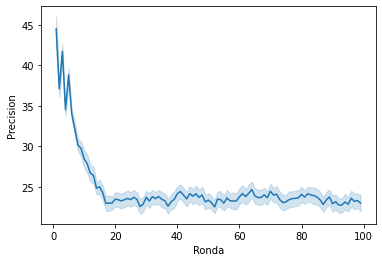

In [5]:
data = P.leer_datos([12],[12],[0],verb=False)
df = data.groupby(['Identificador','Ronda']).agg({
    'Puntaje':'mean',
    'Precision':'mean'
}).reset_index()
sns.lineplot(y='Precision',x='Ronda',data=df)

A pesar de que el modelo está diseñado para que los agentes escojan el predictor más preciso, el promedio de la precisión disminuye a medida que aumentan las rondas. No obstante, el promedio de la precisión converge. Entonces esta disminución de la precisión puede deberse a la manera en que se mide la precisión.

/Users/edgar/Repositorios/ElFarolArthur/Procedatos.py:81: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


<AxesSubplot:xlabel='Precision', ylabel='Puntaje'>

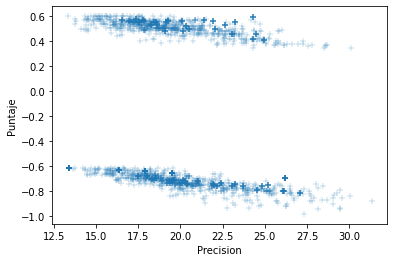

In [6]:
data = P.leer_datos([12],[1],[0],verb=False)
dfA = pd.DataFrame(data[data['Ronda'] > data['Ronda'].max()*.8])
df = dfA.groupby(['Identificador', 'Ronda']).agg({'Puntaje':'mean',
                                                  'Precision':'mean'}).reset_index()
sns.scatterplot(x='Precision',y='Puntaje',data=df, alpha=.5, marker='+')
#sns.regplot(x='Precision',y='Puntaje',data=df)

/Users/edgar/Repositorios/ElFarolArthur/Procedatos.py:81: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


<AxesSubplot:xlabel='Precision', ylabel='Puntaje'>

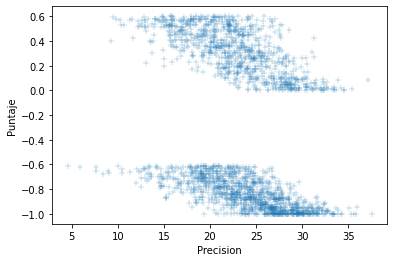

In [7]:
data = P.leer_datos([12],[12],[0],verb=False)
dfA = pd.DataFrame(data[data['Ronda'] > data['Ronda'].max()*.8])
df = dfA.groupby(['Identificador', 'Ronda']).agg({'Puntaje':'mean',
                                                  'Precision':'mean'}).reset_index()
sns.scatterplot(x='Precision',y='Puntaje',data=df, alpha=.5, marker='+')
#sns.regplot(x='Precision',y='Puntaje',data=df)

Sin importar la memoria o el número de predictores, cuanto mayor la precisión promedio de los predictores, menor es el puntaje promedio.

/Users/edgar/Repositorios/ElFarolArthur/Procedatos.py:81: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


<AxesSubplot:xlabel='Precision', ylabel='Estado'>

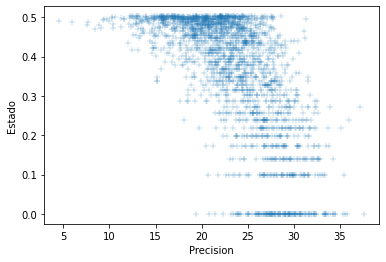

In [8]:
data = P.leer_datos([12],[12],[0],verb=False)
dfA = pd.DataFrame(data[data['Ronda'] > data['Ronda'].max()*.8])
df = dfA.groupby(['Identificador', 'Ronda']).agg({'Estado':'std',
                                                  'Precision':'mean'}).reset_index()
sns.scatterplot(x='Precision',y='Estado',data=df, alpha=.5, marker='+')

A medida que aumenta el promedio de la precisión, también aumenta la uniformidad de las decisiones de los agentes.

# Compara dos modelos

/Users/edgar/Repositorios/ElFarolArthur/Procedatos.py:81: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


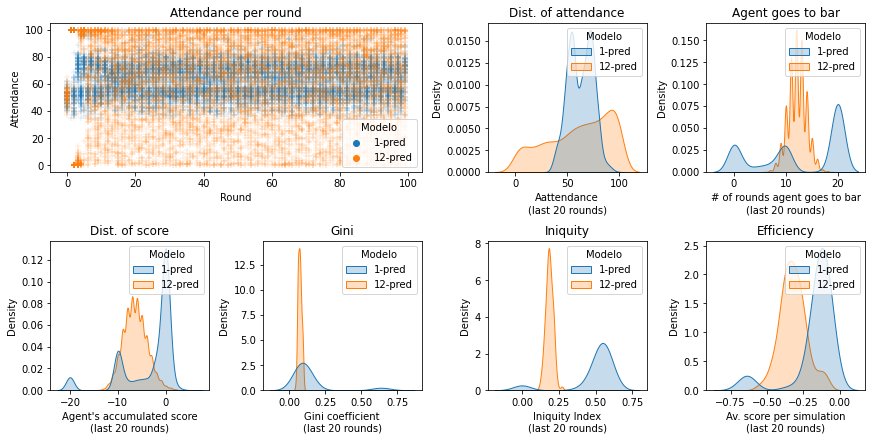

In [9]:
data1 = P.leer_datos([12],[1],[0], verb=False)
data1['Modelo'] = '1-pred'
data2 = P.leer_datos([12],[12],[0], verb=False)
data2['Modelo'] = '12-pred'
data = pd.concat([data1,data2])
G.comparar_desemp(data)

El promedio del `Attendance` es más cercano al 60% para el modelo con 12 predictores que el de 1 predictor. No obstante, la desviación estándar del primero es mayor que la del segundo.

La asistencia de cada agente en las últimas 20 rondas gira en torno a $.6\times 20$ para el modelo con 12 predictores. Por el contrario, para el modelo con 1 solo predictor la mitad de los agentes van todas las rondas y los demás entre 0 y 10.

La distribución de los puntajes es más uniforme (equitativa) para el modelo con 12 predictores, pero los puntajes tienden a ser menores que para el modelo con 1 solo predictor.

# Compara espejos y sin espejos

/Users/edgar/Repositorios/ElFarolArthur/Procedatos.py:81: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


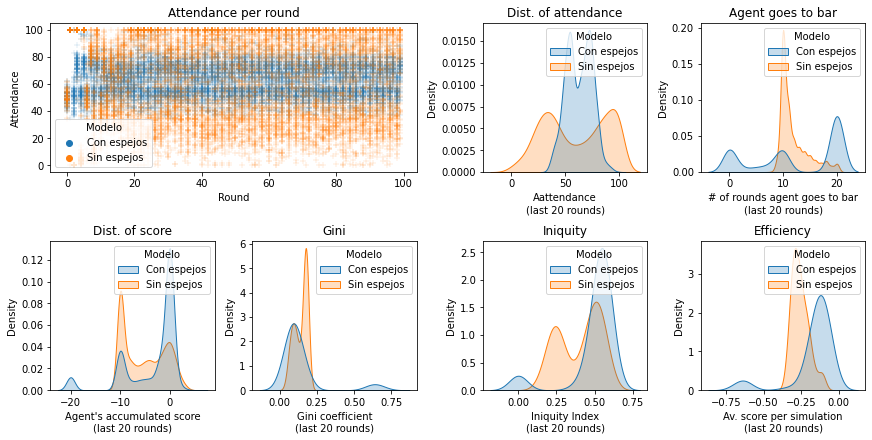

In [10]:
data1 = P.leer_datos([12],[1],[0], verb=False)
data1['Modelo'] = 'Con espejos'
data2 = P.leer_datos([12],[1],[0], verb=False, espejos=False)
data2['Modelo'] = 'Sin espejos'
data = pd.concat([data1,data2])
G.comparar_desemp(data)

/Users/edgar/Repositorios/ElFarolArthur/Procedatos.py:81: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


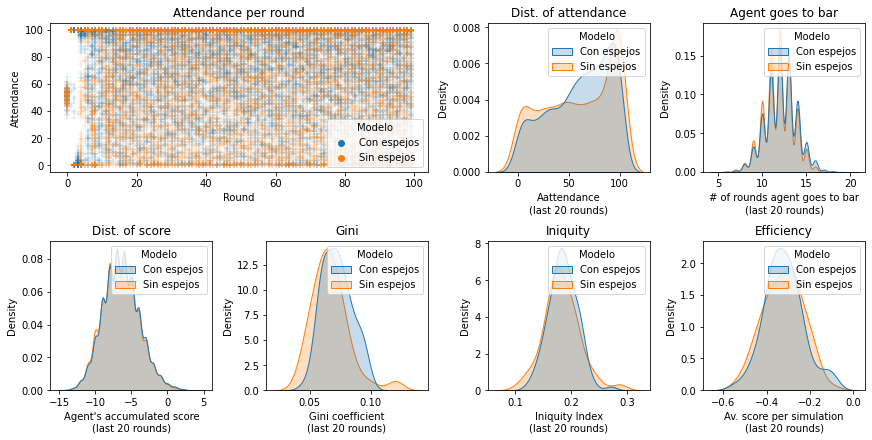

In [11]:
data1 = P.leer_datos([12],[12],[0], verb=False)
data1['Modelo'] = 'Con espejos'
data2 = P.leer_datos([12],[12],[0], verb=False, espejos=False)
data2['Modelo'] = 'Sin espejos'
data = pd.concat([data1,data2])
G.comparar_desemp(data)

Es mejor tener espejos, tanto en desviación estándar del `Attendance` como en el `Efficiency`.

/Users/edgar/Repositorios/ElFarolArthur/Procedatos.py:81: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():
/Users/edgar/Repositorios/ElFarolArthur/Procedatos.py:81: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


<AxesSubplot:xlabel='Estado', ylabel='Precision'>

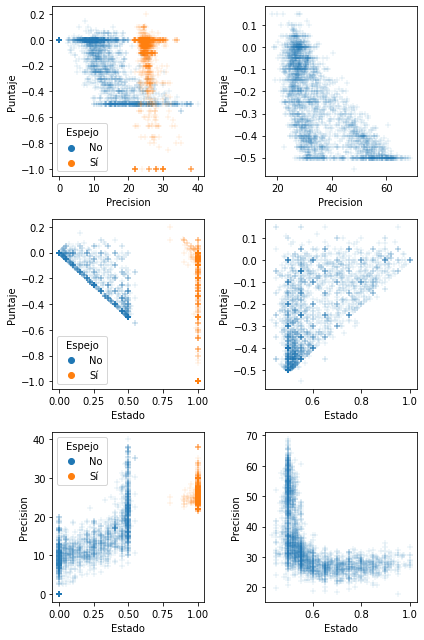

In [12]:
data1 = P.leer_datos([12],[1],[0], verb=False)
dfA = pd.DataFrame(data1[data1['Ronda']>int(max(data1.Ronda)*.8)])
df1 = pd.DataFrame(dfA.groupby('Politica').agg({'Precision':'mean', 'Puntaje':'mean', 'Estado':'mean'}).reset_index())
df1['Espejo'] = df1['Politica'].apply(lambda x:'Sí' if 'espejo' in x else 'No')

data2 = P.leer_datos([12],[1],[0], verb=False, espejos=False)
dfB = pd.DataFrame(data2[data2['Ronda']>int(max(data2.Ronda)*.8)])
df2 = pd.DataFrame(dfB.groupby('Politica').agg({'Precision':'mean', 'Puntaje':'mean', 'Estado':'mean'}).reset_index())

fig, ax = plt.subplots(3,2, figsize=(6,9), tight_layout=True) 


sns.scatterplot(x='Precision',y='Puntaje',hue='Espejo',
                data=df1,alpha=0.25,marker='+',ax=ax[0,0])

sns.scatterplot(x='Precision',y='Puntaje',
                data=df2,alpha=0.25,marker='+',ax=ax[0,1])


sns.scatterplot(x='Estado',y='Puntaje',hue='Espejo',
                data=df1,alpha=0.25,marker='+',ax=ax[1,0])

sns.scatterplot(x='Estado',y='Puntaje',
                data=df2,alpha=0.25,marker='+',ax=ax[1,1])

sns.scatterplot(x='Estado',y='Precision',hue='Espejo',
                data=df1,alpha=0.25,marker='+',ax=ax[2,0])

sns.scatterplot(x='Estado',y='Precision',
                data=df2,alpha=0.25,marker='+',ax=ax[2,1])


/Users/edgar/Repositorios/ElFarolArthur/Procedatos.py:81: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():
/Users/edgar/Repositorios/ElFarolArthur/Procedatos.py:81: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


<AxesSubplot:xlabel='Estado', ylabel='Precision'>

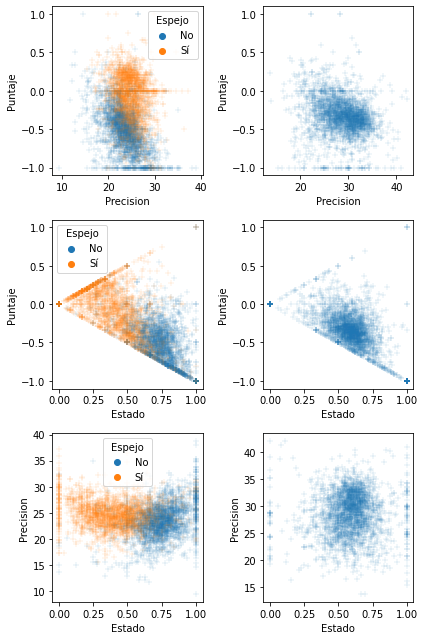

In [13]:
data1 = P.leer_datos([12],[12],[0], verb=False)
dfA = pd.DataFrame(data1[data1['Ronda']>int(max(data1.Ronda)*.8)])
df1 = pd.DataFrame(dfA.groupby('Politica').agg({'Precision':'mean', 'Puntaje':'mean', 'Estado':'mean'}).reset_index())
df1['Espejo'] = df1['Politica'].apply(lambda x:'Sí' if 'espejo' in x else 'No')

data2 = P.leer_datos([12],[12],[0], verb=False, espejos=False)
dfB = pd.DataFrame(data2[data2['Ronda']>int(max(data2.Ronda)*.8)])
df2 = pd.DataFrame(dfB.groupby('Politica').agg({'Precision':'mean', 'Puntaje':'mean', 'Estado':'mean'}).reset_index())

fig, ax = plt.subplots(3,2, figsize=(6,9), tight_layout=True) 


sns.scatterplot(x='Precision',y='Puntaje',hue='Espejo',
                data=df1,alpha=0.25,marker='+',ax=ax[0,0])

sns.scatterplot(x='Precision',y='Puntaje',
                data=df2,alpha=0.25,marker='+',ax=ax[0,1])


sns.scatterplot(x='Estado',y='Puntaje',hue='Espejo',
                data=df1,alpha=0.25,marker='+',ax=ax[1,0])

sns.scatterplot(x='Estado',y='Puntaje',
                data=df2,alpha=0.25,marker='+',ax=ax[1,1])

sns.scatterplot(x='Estado',y='Precision',hue='Espejo',
                data=df1,alpha=0.25,marker='+',ax=ax[2,0])

sns.scatterplot(x='Estado',y='Precision',
                data=df2,alpha=0.25,marker='+',ax=ax[2,1])


COMPARAR COMPORTAMIENTO DE ACUERDO A CANTIDAD DE ESTRATEGIAS USADAS.

# Distintos modelos aleatorios

/Users/edgar/Repositorios/ElFarolArthur/Procedatos.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lleva_recurso'] = df['Puntaje'].apply(lambda x: 1 if x == 1 else 0)


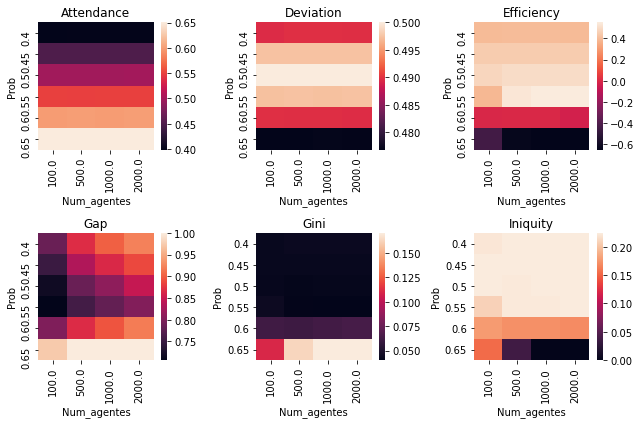

In [14]:
data = P.leer_datos_aleatorio([.4,.45,.5,.55,.6,.65],[0],[100,500,1000,2000],verb=False)
G.graficar_heatmaps(data, parametros=['Prob','Num_agentes'])


El promedio del `Attendance` va aumentando a medida que aumenta la probabilidad. El número de agentes no parece tener efecto sobre este promedio.

La desviación estándar del `Attendance` hace una especie de cuencia en los extremos de la probabilidad. El número de agentes no parece tener efecto sobre esta desviación (sin embargo, sí hay cambio, pero es muy pequeño; ver abajo). 

La peor `Efficiency` es cuando la probabilidad supera el umbral y cuando se acerca por encima a éste. Es máxima cuando la probabilidad es 0.55 y la cantidad de agentes es 2000.

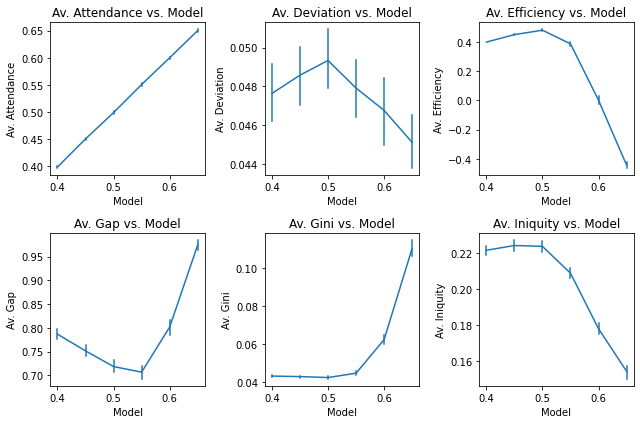

In [15]:
data = P.leer_datos_aleatorio([.4,.45,.5,.55,.6,.65],[0],[100],verb=False)
data['Modelo'] = data['Prob']
G.comparacion(data)

Al variar la probabilidad, se observa que el promedio del `Attendance` depende directamente de esta probabilidad. La variación cambia, pero muy poco. La eficiencia sube hasta un pico en $p=.5$ y luego disminuye drásticamente.

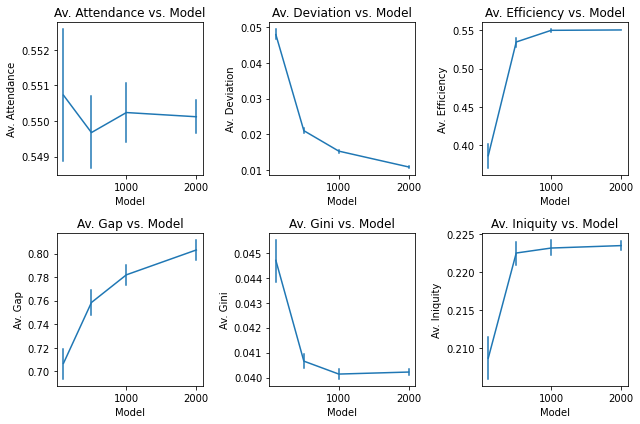

In [16]:
data = P.leer_datos_aleatorio([.55],[0],[100,500,1000,2000],verb=False)
data['Modelo'] = data['Num_agentes']
G.comparacion(data)

Cuando $p=.5$, la desviación estándar del `Attendance` disminuye un poco a medida que aumenta la cantidad de agentes. La `Efficiency` aumenta a medida que aumenta la cantidad de agentes.

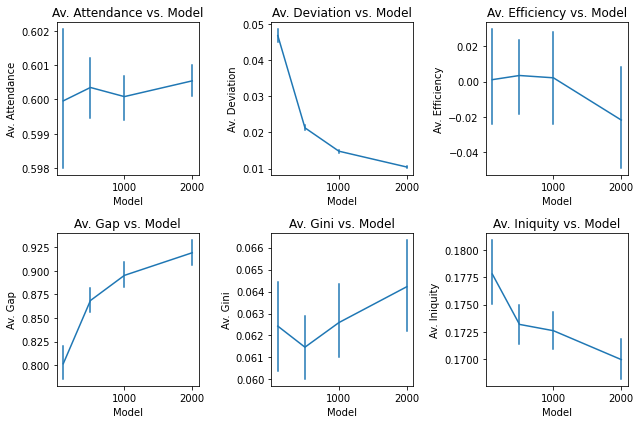

In [17]:
data = P.leer_datos_aleatorio([.6],[0],[100,500,1000,2000],verb=False)
data['Modelo'] = data['Num_agentes']
G.comparacion(data)

Cuando la probabilidad es $p=.6$, y a pesar de que la desviación disminuye cuando aumenta el número de agentes, la `Efficiency` del modelo es menor que con probabilidades $p<.6$. Aparentemente, la `Efficiency` de $p=.6$ es igual a la de $p=0$. Esto muestra que una concurrencia cerca a la frontera representa demasiado riesgo para los agentes.

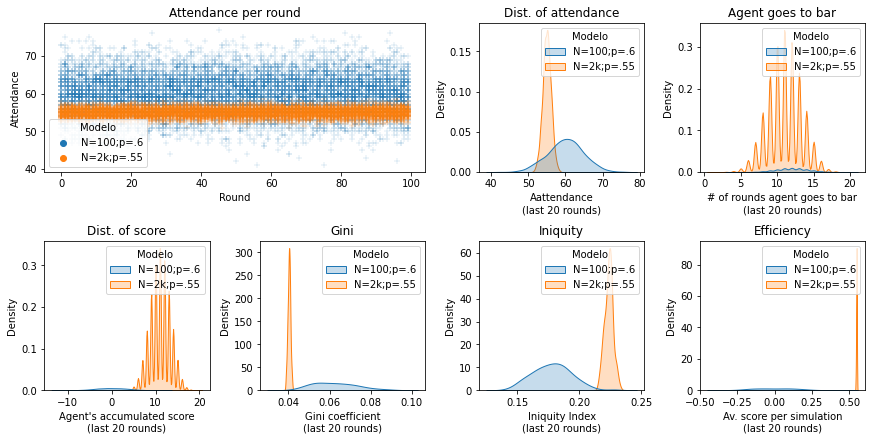

In [19]:
data1 = P.leer_datos_aleatorio([.55],[0],[2000], verb=False)
data1['Modelo'] = 'N=2k;p=.55'
data2 = P.leer_datos_aleatorio([.6],[0],[100], verb=False)
data2['Modelo'] = 'N=100;p=.6'
data = pd.concat([data1,data2])
G.comparar_desemp(data)

# Comparando Arthur vs Aleatorio

/Users/edgar/Repositorios/ElFarolArthur/Procedatos.py:81: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


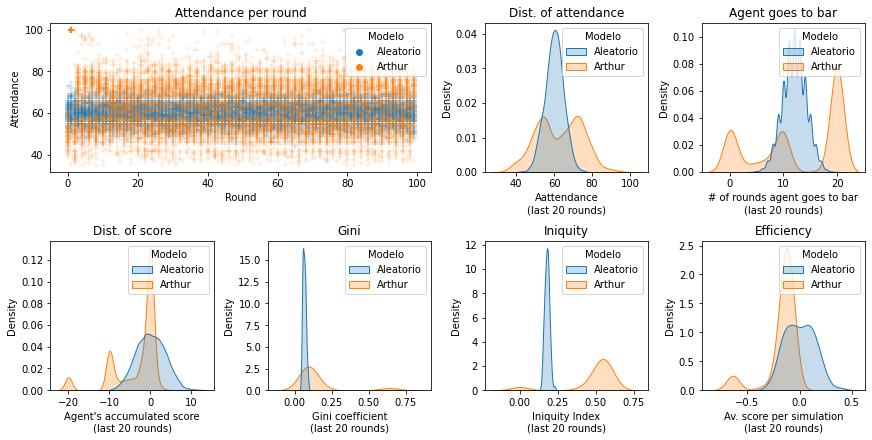

In [20]:
data1 = P.leer_datos([12],[1],[0], verb=False)
data1['Modelo'] = 'Arthur'
data2 = P.leer_datos_aleatorio([.6],[0],[100],verb=False)
data2['Modelo'] = 'Aleatorio'
data = pd.concat([data1,data2])
G.comparar_desemp(data)

Es muchísimo mejor el modelo aleatorio en todos los indicadores respecto a un modelo con memoria 12 y con 1 predictor.

/Users/edgar/Repositorios/ElFarolArthur/Procedatos.py:81: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


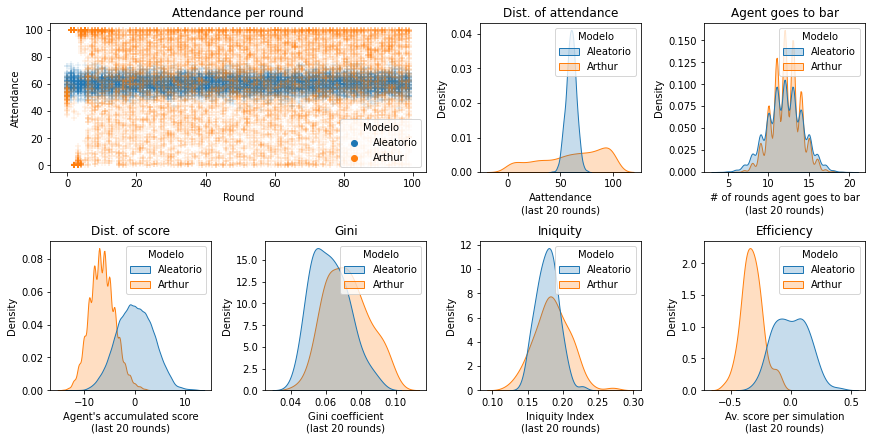

In [21]:
data1 = P.leer_datos([12],[12],[0], verb=False)
data1['Modelo'] = 'Arthur'
data2 = P.leer_datos_aleatorio([.6],[0],[100],verb=False)
data2['Modelo'] = 'Aleatorio'
data = pd.concat([data1,data2])
G.comparar_desemp(data)

# Comparación mejor Arthur vs mejor Aleatorio

/Users/edgar/Repositorios/ElFarolArthur/Procedatos.py:81: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


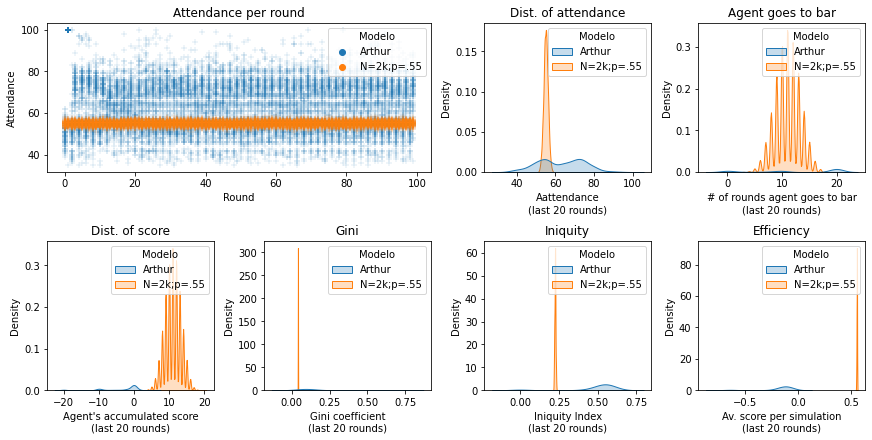

In [22]:
data1 = P.leer_datos([12],[1],[0], verb=False)
data1['Modelo'] = 'Arthur'
data2 = P.leer_datos_aleatorio([.55],[0],[2000], verb=False)
data2['Modelo'] = 'N=2k;p=.55'
data = pd.concat([data1,data2])
G.comparar_desemp(data)

---

# Simulaciones individuales

/Users/edgar/Repositorios/ElFarolArthur/Procedatos.py:81: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


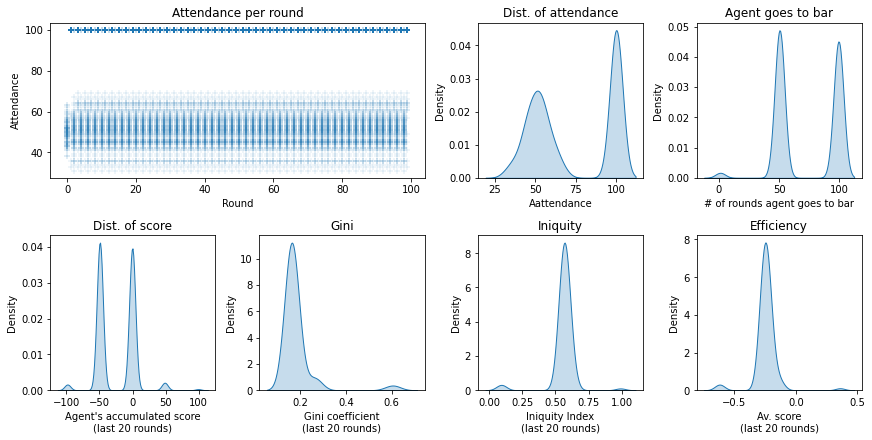

In [23]:
data = P.leer_datos([1],[1],[0],verb=False)
G.graficar_desemp(data)

# Variando conectividad

/Users/edgar/Repositorios/ElFarolArthur/Procedatos.py:81: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


Archivo ./data/data_todo/simulacion-9-3-0.004.csv no existe! Saltando a siguiente opción
Archivo ./data/data_todo/simulacion-9-3-0.006.csv no existe! Saltando a siguiente opción
Archivo ./data/data_todo/simulacion-9-3-0.008.csv no existe! Saltando a siguiente opción
Archivo ./data/data_todo/simulacion-9-3-0.01.csv no existe! Saltando a siguiente opción
Archivo ./data/data_todo/simulacion-9-3-0.03.csv no existe! Saltando a siguiente opción


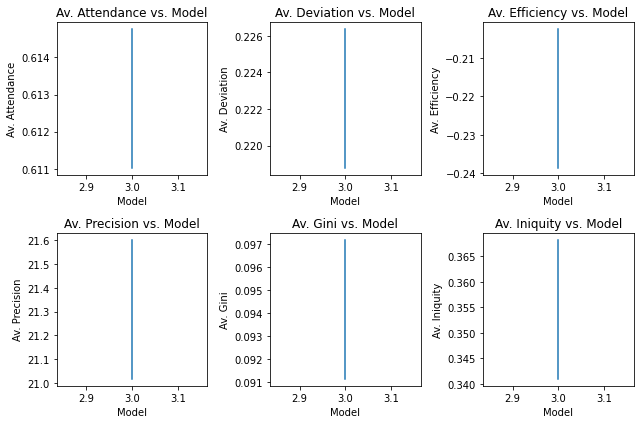

In [24]:
data = P.leer_datos([9],[3],[0, .004, .006, .008, .01, .03],verb=False)
data['Modelo'] = data['Num_predic']
G.comparacion(data)